In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Mendota = pd.read_csv('HW5/MENDOTA.csv')
Monona = pd.read_csv('HW5/MONONA.csv')

In [3]:
Mendota = Mendota.dropna(axis=0,how='all')
Mendota = Mendota.dropna(axis=1,how='all')
Mendota

,WINTER,CLOSED,OPENED,DAYS
0,1855-56,18 Dec,14 Apr,118
1,1856-57,6 Dec,6 May,151
2,1857-58,25 Nov,26 Mar,121
3,1858-59,8 Dec,14 Mar,96
4,1859-60,7 Dec,26 Mar,110
...,...,...,...,...
166,2015-16,11 Jan,13 Mar,62
167,2016-17,1 Jan,7 Mar,65
168,2017-18,27 Dec,31 Mar,94
169,2018-19,15 Dec,21 Dec,---


In [4]:
Monona = Monona.dropna(axis=0,how='all')
Monona = Monona.dropna(axis=1,how='all')
Monona

,WINTER,CLOSED,OPENED,DAYS
0,1855-56,18 Dec,14 Apr,118
1,1856-57,4 Dec,4 May,151
2,1857-58,23 Nov,22 Mar,119
3,1858-59,11 Dec,15 Mar,94
4,1859-60,6 Dec,26 Mar,111
...,...,...,...,...
166,2015-16,11 Jan,13 Mar,62
167,2016-17,16 Dec,7 Mar,81
168,2017-18,26 Dec,29 Mar,93
169,2018-19,11 Dec,28 Dec,---


In [5]:
for i in range(Mendota.shape[0]):
    if Mendota.iloc[i,0] == '"':
        Mendota.iloc[i-1,3] = Mendota.iloc[i,3]
        
Mendota = Mendota.drop(index = Mendota.loc[Mendota.iloc[:,0] == '"',:].index)
Mendota = Mendota.drop(index = 169)
Mendota['WINTER'] = Mendota['WINTER'].str.lstrip()
Mendota['YEAR'] = [float(x[:4]) for x in Mendota['WINTER']]
Mendota['DAYS'] = [float(x) for x in Mendota['DAYS']]
Mendota = Mendota.reset_index(drop=True)
Mendota

,WINTER,CLOSED,OPENED,DAYS,YEAR
0,1855-56,18 Dec,14 Apr,118.0,1855.0
1,1856-57,6 Dec,6 May,151.0,1856.0
2,1857-58,25 Nov,26 Mar,121.0,1857.0
3,1858-59,8 Dec,14 Mar,96.0,1858.0
4,1859-60,7 Dec,26 Mar,110.0,1859.0
...,...,...,...,...,...
158,2013-14,16 Dec,12 Apr,117.0,2013.0
159,2014-15,2 Jan,3 Apr,91.0,2014.0
160,2015-16,11 Jan,13 Mar,62.0,2015.0
161,2016-17,1 Jan,7 Mar,65.0,2016.0


In [6]:
for i in range(Monona.shape[0]):
    if Monona.iloc[i,0] == '"':
        Monona.iloc[i-1,3] = Monona.iloc[i,3]
        
Monona = Monona.drop(index = Monona.loc[Monona.iloc[:,0] == '"',:].index)
Monona = Monona.drop(index = 169)
Monona['WINTER'] = Monona['WINTER'].str.lstrip()
Monona['YEAR'] = [float(x[:4]) for x in Monona['WINTER']]
Monona['DAYS'] = [float(x) for x in Monona['DAYS']]
Monona = Monona.reset_index(drop=True)
Monona

,WINTER,CLOSED,OPENED,DAYS,YEAR
0,1855-56,18 Dec,14 Apr,118.0,1855.0
1,1856-57,4 Dec,4 May,151.0,1856.0
2,1857-58,23 Nov,22 Mar,119.0,1857.0
3,1858-59,11 Dec,15 Mar,94.0,1858.0
4,1859-60,6 Dec,26 Mar,111.0,1859.0
...,...,...,...,...,...
158,2013-14,10 Dec,10 Apr,121.0,2013.0
159,2014-15,2 Dec,16 Dec,105.0,2014.0
160,2015-16,11 Jan,13 Mar,62.0,2015.0
161,2016-17,16 Dec,7 Mar,81.0,2016.0


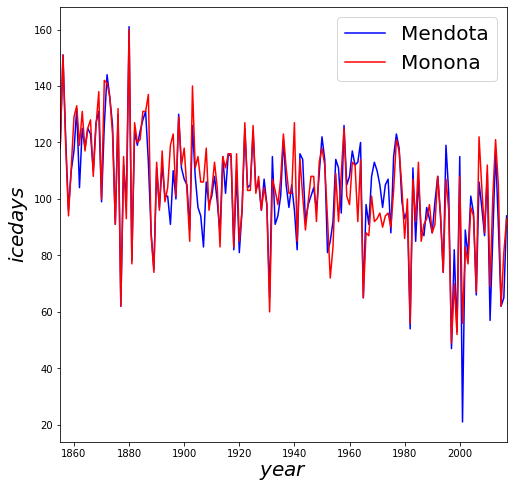

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(Mendota.iloc[:,4], Mendota.iloc[:,3], c = 'b')
ax.plot(Monona.iloc[:,4], Monona.iloc[:,3], c = 'r')
ax.set_xlabel('$year$', fontsize=20)
ax.set_ylabel('$ice days$', fontsize=20)
ax.set_xlim([Mendota.iloc[0,4],Mendota.iloc[-1,4]])
ax.legend(['Mendota','Monona'], fontsize=20)

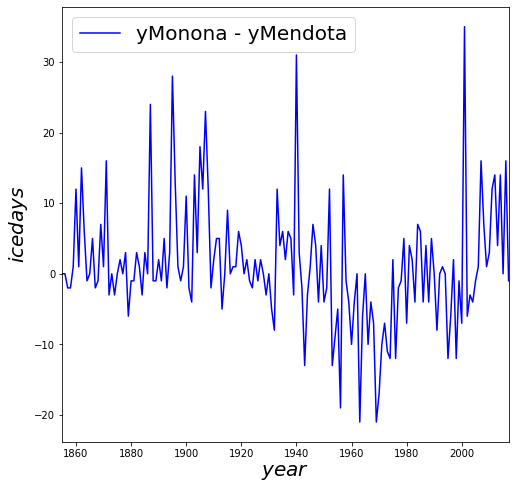

In [17]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(Mendota.iloc[:,4], Monona.iloc[:,3] - Mendota.iloc[:,3], c = 'b')
ax.set_xlabel('$year$', fontsize=20)
ax.set_ylabel('$ice days$', fontsize=20)
ax.set_xlim([Mendota.iloc[0,4],Mendota.iloc[-1,4]])
ax.legend(['yMonona - yMendota'], fontsize=20)

In [12]:
Mendota_train = Mendota.loc[Mendota.iloc[:,4] <= 1970,:]
Mendota_test = Mendota.loc[Mendota.iloc[:,4] > 1970,:]

In [15]:
Monona_train = Monona.loc[Monona.iloc[:,4] <= 1970,:]
Monona_test = Monona.loc[Monona.iloc[:,4] > 1970,:]

In [20]:
Mendota_train.iloc[:,3].mean()

107.1896551724138

In [21]:
Mendota_train.iloc[:,3].std()

16.74666159754441

In [35]:
X = np.zeros((Mendota_train.shape[0],3))
X[:,0] = 1
X[:,1] = Mendota_train.iloc[:,-1]
X[:,2] = Monona_train.iloc[:,-2]
y = Mendota_train.iloc[:,-2]

In [42]:
betas = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
betas

array([-6.41827663e+01,  4.12245664e-02,  8.52950638e-01])

In [40]:
Xtest = np.zeros((Mendota_test.shape[0],3))
Xtest[:,0] = 1
Xtest[:,1] = Mendota_test.iloc[:,-1]
Xtest[:,2] = Monona_test.iloc[:,-2]
ytest = Mendota_test.iloc[:,-2]

In [46]:
Xtest[0,:].dot(betas)

98.10116473376362

In [48]:
np.var(Xtest.dot(betas)-ytest)

95.4320036656619

In [51]:
SStot = (ytest - np.mean(ytest)).dot(ytest - np.mean(ytest))
SSres = (Xtest.dot(betas)-ytest).dot(Xtest.dot(betas)-ytest)
Rs = 1 - SSres/SStot
Rs

0.7222004631364354

In [90]:
beta = np.zeros(3)
n = Mendota_train.shape[0]
ita = 0.1

print('Initial value of f:', (X.dot(beta)-y).T.dot(X.dot(beta)-y)/n)
for i in range(10):
    deltaf = 2*X.T.dot(X.dot(beta) - y)/n
    beta_n = beta - ita * deltaf
    beta = beta_n
    print('Initial value of f at %d th iternation is %f:'%(i, (X.dot(beta)-y).T.dot(X.dot(beta)-y)/n))

Initial value of f: 11767.655172413793
Initial value of f at 0 th iternation is 6180350808297761.000000:
Initial value of f at 1 th iternation is 3330626781514359269050286080.000000:
Initial value of f at 2 th iternation is 1794894028506586514112381672499294765056.000000:
Initial value of f at 3 th iternation is 967278769104172867412984829954616645534385501634560.000000:
Initial value of f at 4 th iternation is 521272120972043777614288963608996233579918996138442022182715392.000000:
Initial value of f at 5 th iternation is 280916559715608851654352636514580749961818875114591951729043038697177481216.000000:
Initial value of f at 6 th iternation is 151387558143907458311038196472985399841885495842934131224130698007609383697573115592704.000000:
Initial value of f at 7 th iternation is 81583630327726510843678091578155178631129511901691949062094134179326439213944276265101969967808512.000000:
Initial value of f at 8 th iternation is 43965890057650054030769646161060083320927170689881449561343482

In [54]:
print(beta)

[-1.11205870e+58 -2.12745363e+61 -1.20499387e+60]


In [83]:
beta = np.zeros(3)
n = Mendota_train.shape[0]
ita = 0.0001

print('Initial value of f:', (X.dot(beta)-y).T.dot(X.dot(beta)-y)/n)
for i in range(10):
    deltaf = 2*X.T.dot(X.dot(beta) - y)/n
    beta_n = beta - ita * deltaf
    beta = beta_n
    print('Initial value of f %f at %d th iternation:'%((X.dot(beta)-y).T.dot(X.dot(beta)-y)/n, i))

Initial value of f: 11767.655172413793
Initial value of f 6163541503.948577 at 0 th iternation:
Initial value of f 3312533871817739.500000 at 1 th iternation:
Initial value of f 1780288348615921893376.000000 at 2 th iternation:
Initial value of f 956798247765122620890021888.000000 at 3 th iternation:
Initial value of f 514221692029907592692652354568192.000000 at 4 th iternation:
Initial value of f 276363328603223694709658069813168177152.000000 at 5 th iternation:
Initial value of f 148528719383956473858290359991788379685519360.000000 at 6 th iternation:
Initial value of f 79825281426939467664876590671505086010814688657408.000000 at 7 th iternation:
Initial value of f 42901302733364642617609555373683384407155462859378393088.000000 at 8 th iternation:
Initial value of f 23056878013068431094169364752487790908835683363322899447414784.000000 at 9 th iternation:


In [84]:
print(beta)

[-1.30800311e+24 -2.50231031e+27 -1.41731342e+26]


In [92]:
beta = np.zeros(3)
n = Mendota_train.shape[0]
ita = 1E-7

print('Initial value of f:', (X.dot(beta)-y).T.dot(X.dot(beta)-y)/n)
for i in range(10):
    deltaf = 2*X.T.dot(X.dot(beta) - y)/n
    beta_n = beta - ita * deltaf
    beta = beta_n
    print('Initial value of f %f at %d th iternation:'%((X.dot(beta)-y).T.dot(X.dot(beta)-y)/n, i))

Initial value of f: 11767.655172413793
Initial value of f 1110.112916 at 0 th iternation:
Initial value of f 356.579867 at 1 th iternation:
Initial value of f 303.272176 at 2 th iternation:
Initial value of f 299.471265 at 3 th iternation:
Initial value of f 299.170547 at 4 th iternation:
Initial value of f 299.117301 at 5 th iternation:
Initial value of f 299.081557 at 6 th iternation:
Initial value of f 299.047054 at 7 th iternation:
Initial value of f 299.012644 at 8 th iternation:
Initial value of f 298.978245 at 9 th iternation:


In [93]:
print(beta)

[2.94018517e-05 5.57740294e-02 3.74669382e-03]


In [98]:
beta - np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

array([ 6.41827957e+01,  1.45494630e-02, -8.49203945e-01])

In [100]:
np.linalg.norm(beta - np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)))

64.18841501944135

In [101]:
np.linalg.cond(X)

127203.99135311878

In [102]:
np.linalg.cond(X.T.dot(X))

16180855377.180597

In [113]:
X = np.zeros((Mendota_train.shape[0],3))
X[:,0] = 1
X[:,1] = (Mendota_train.iloc[:,-1] - min(Mendota_train.iloc[:,-1]))/(max(Mendota_train.iloc[:,-1]) - min(Mendota_train.iloc[:,-1]))
X[:,2] = (Monona_train.iloc[:,-2] - min(Monona_train.iloc[:,-2]))/(max(Monona_train.iloc[:,-2]) - min(Monona_train.iloc[:,-2]))
y = (Mendota_train.iloc[:,-2] - min(Mendota_train.iloc[:,-2]))/(max(Mendota_train.iloc[:,-2]) - min(Mendota_train.iloc[:,-2]))

In [114]:
betas = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
betas

array([0.01480649, 0.04788712, 0.8615663 ])

In [115]:
beta = np.zeros(3)
n = Mendota_train.shape[0]
ita = 0.1

print('Initial value of f:', (X.dot(beta)-y).T.dot(X.dot(beta)-y)/n)
for i in range(10):
    deltaf = 2*X.T.dot(X.dot(beta) - y)/n
    beta_n = beta - ita * deltaf
    beta = beta_n
    print('Initial value of f at %d th iternation is %f:'%(i, (X.dot(beta)-y).T.dot(X.dot(beta)-y)/n))

Initial value of f: 0.23672461290016147
Initial value of f at 0 th iternation is 0.129417:
Initial value of f at 1 th iternation is 0.076513:
Initial value of f at 2 th iternation is 0.050311:
Initial value of f at 3 th iternation is 0.037221:
Initial value of f at 4 th iternation is 0.030572:
Initial value of f at 5 th iternation is 0.027090:
Initial value of f at 6 th iternation is 0.025170:
Initial value of f at 7 th iternation is 0.024023:
Initial value of f at 8 th iternation is 0.023261:
Initial value of f at 9 th iternation is 0.022695:


In [116]:
beta

array([0.29601785, 0.108217  , 0.19333256])

In [117]:
np.linalg.cond(X)

9.352695233439869

In [118]:
np.linalg.cond(X.T.dot(X))

87.4729081296092

In [122]:
np.linalg.norm(beta - betas)

0.7274997318554942

In [123]:
X = np.zeros((Mendota_train.shape[0],2))
X[:,0] = 1
X[:,1] = Mendota_train.iloc[:,-1]
y = Mendota_train.iloc[:,-2]

In [130]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

array([ 4.06111060e+02, -1.56298774e-01])

In [133]:
X = np.zeros((Mendota_train.shape[0],3))
X[:,0] = 1
X[:,1] = Mendota_train.iloc[:,-1]
X[:,2] = Monona_train.iloc[:,-2]
y = Mendota_train.iloc[:,-2]

In [134]:
n = Mendota_train.shape[0]
lambd = 1
A = np.array([[0,0,0],[0,1,0],[0,0,1]])
(2/n)*np.linalg.inv((2/n)*X.T.dot(X) + 2*lambd*A).dot(X.T.dot(y))

array([-6.23294723e+01,  4.04390872e-02,  8.49714502e-01])